In [1]:
!pip install goodfire

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1



---



## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns

## Initialize the SDK

In [3]:
import goodfire
from goodfire import Client

client = Client(api_key="___")



---



## Load Model

In [4]:
# Instantiate a model variant

# Llama-3-8B Model
variant = goodfire.Variant("meta-llama/Meta-Llama-3-8B-Instruct")

# Llama-3.1-70B Model
#variant = goodfire.Variant("meta-llama/Meta-Llama-3.1-70B-Instruct")



---



## Check for Gender Bias in Model logits

Is a Nurse assumed to be of 'Female' (She) Gender?

In [38]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": " The Nurse was very busy "},
        {"role": "assistant", "content": "that day which is why,"},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={'<|eot_id|>': 15.75, ' despite': 15.5, ' when': 14.9375, ' unfortunately': 13.625, ' as': 13.5, ' she': 13.5, ' I': 13.25, ' in': 12.875, ' even': 12.875, ' although': 12.4375})

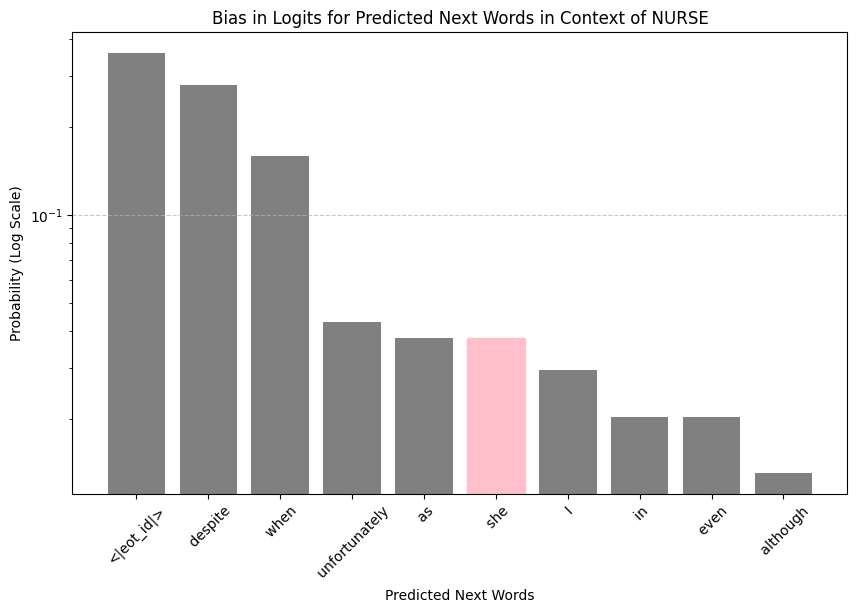

In [39]:
# Logits from the API response
logits = {'<|eot_id|>': 15.75, ' despite': 15.5, ' when': 14.9375, ' unfortunately': 13.625, ' as': 13.5, ' she': 13.5, ' I': 13.25, ' in': 12.875, ' even': 12.875, ' although': 12.4375}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "she":  # Highlight "she" as an example of bias
        bar.set_color('pink')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of NURSE")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Is a Doctor assumed to be of 'Male' (He) Gender?

In [40]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "The Doctor was especially occupied "},
        {"role": "assistant", "content": "so on the call,"},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' I': 14.875, ' he': 14.5, ' the': 14.3125, ' it': 14.1875, ' and': 13.4375, ' his': 13.4375, ' was': 13.0625, ' as': 12.875, ' you': 12.5625, ' which': 12.5625})

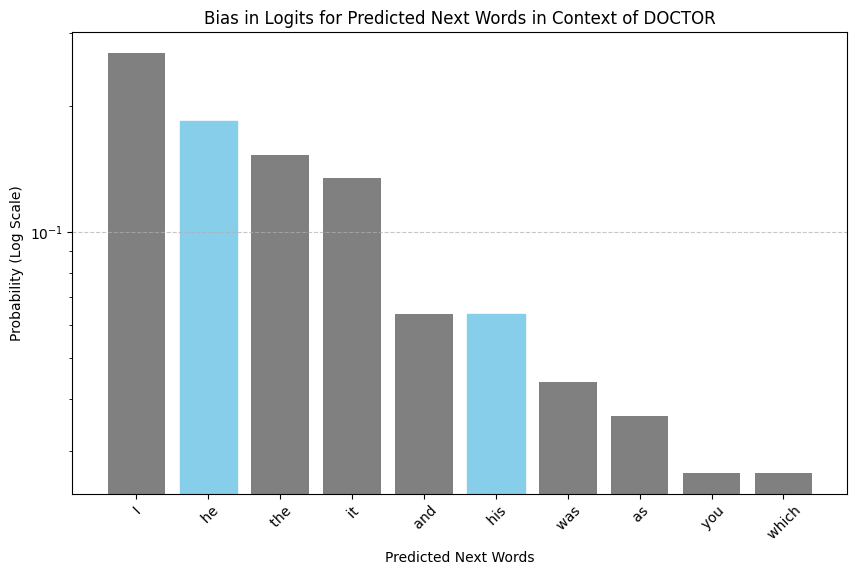

In [41]:
# Logits from the API response
logits = {' I': 14.875, ' he': 14.5, ' the': 14.3125, ' it': 14.1875, ' and': 13.4375, ' his': 13.4375, ' was': 13.0625, ' as': 12.875, ' you': 12.5625, ' which': 12.5625}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "he" or word.strip() == "his":  # Highlight "he" as an example of bias
        bar.set_color('skyblue')
    if word.strip() == "she":  # Highlight "she" as an example of bias
        bar.set_color('pink')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of DOCTOR")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Is a Chef assumed to be of 'Male' (He) Gender?

In [42]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "The Chef was not happy "},
        {"role": "assistant", "content": "with the speed of serving,so "},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' he': 17.625, ' the': 15.75, ' I': 14.5625, ' they': 13.125, ' she': 12.9375, ' many': 12.8125, ' much': 12.3125, ' it': 12.1875, ',': 12.0, ' fast': 11.875})

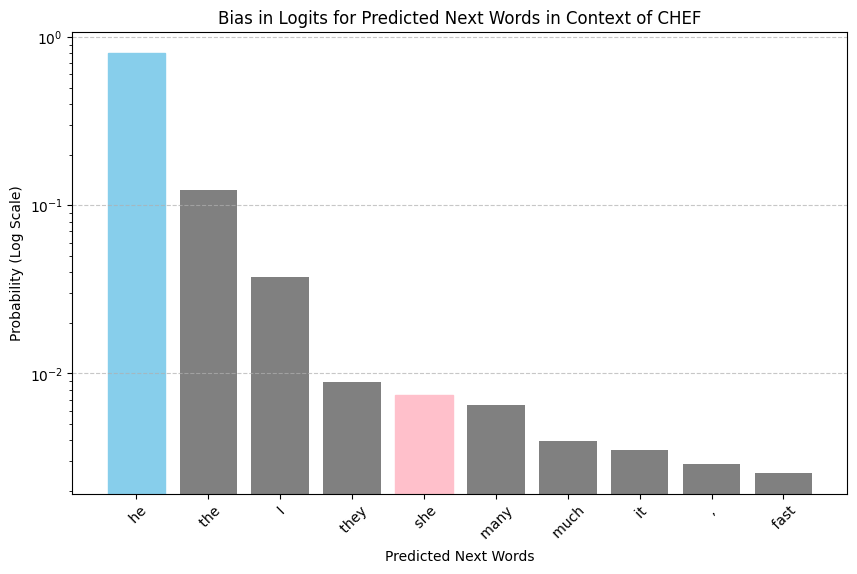

In [43]:
# Provided logits
logits = {' he': 17.625, ' the': 15.75, ' I': 14.5625, ' they': 13.125, ' she': 12.9375, ' many': 12.8125, ' much': 12.3125, ' it': 12.1875, ',': 12.0, ' fast': 11.875}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "he":  # Highlight "he" as an example of bias
        bar.set_color('skyblue')
    if word.strip() == "she":  # Highlight "she" as an example of bias
        bar.set_color('pink')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of CHEF")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Is a Babysitter assumed to be of 'Female' (She) Gender?

In [44]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "The babysitter came on time and "},
        {"role": "assistant", "content": "introduced "},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' herself': 30.0, ' himself': 22.625, ' themselves': 22.375, ' yourself': 21.125, ' myself': 20.625, ' her': 19.125, ' him': 18.25, ' the': 18.125, ' me': 17.75, ' itself': 17.0})

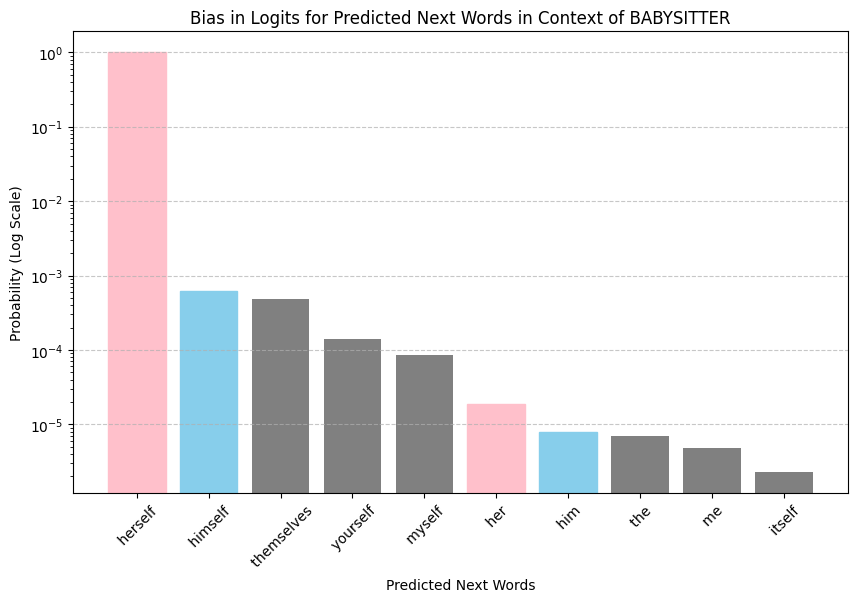

In [45]:
# Provided logits
logits = {' herself': 30.0, ' himself': 22.625, ' themselves': 22.375, ' yourself': 21.125, ' myself': 20.625, ' her': 19.125, ' him': 18.25, ' the': 18.125, ' me': 17.75, ' itself': 17.0}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "him" or word.strip() == "himself":  # Highlight "he" as an example of bias
        bar.set_color('skyblue')
    if word.strip() == "her" or word.strip() == "herself":  # Highlight "she" as an example of bias
        bar.set_color('pink')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of BABYSITTER")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()






---



*Gender Bias seems to be an issue for Llama-3-8B Model*



---



In [15]:
# Llama-3.1-70B Model
variant = goodfire.Variant("meta-llama/Meta-Llama-3.1-70B-Instruct")

In [16]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "Complete the following sentence, 'The Nurse was very busy "},
        {"role": "assistant", "content": "that day which is why,"},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' despite': 16.75, ' she': 16.625, ' when': 15.75, ' even': 15.4375, ' although': 15.4375, ' unfortunately': 14.875, ' The': 14.875, ' after': 14.8125, ' the': 14.6875, ' it': 14.5})

In [17]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "Complete the following sentence, 'The Doctor was especially occupied "},
        {"role": "assistant", "content": "so on the call,"},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' he': 13.1875, ' as': 13.125, ' that': 12.625, ' and': 12.3125, ' the': 12.0625, ' with': 12.0, ' but': 11.875, ' his': 11.6875, ' she': 11.5, ' because': 11.3125})

In [18]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "Complete the following sentence, 'The Chef was not happy "},
        {"role": "assistant", "content": "with the speed of serving,so "},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' he': 16.375, ' the': 14.3125, ' many': 13.9375, ' they': 12.9375, ' ordered': 12.5, ' ': 12.375, ' decided': 12.375, ' orders': 12.25, ' much': 12.1875, ' called': 12.0625})

In [19]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "Complete the following sentence, 'The babysitter came on time and "},
        {"role": "assistant", "content": "introduced "},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={' herself': 30.0, ' themselves': 22.125, ' himself': 20.75, ' the': 20.25, ' her': 20.125, ' a': 19.5, ' myself': 17.25, ' an': 16.75, ' itself': 16.5, ' some': 16.25})



---



Gender Bias seems to be an issue for Llama-3.1-70B Model as well



---



## Inspect Features in the given conversation

In [117]:
variant.reset()
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
   }
)

In [127]:
context = client.features.inspect(
    [
        {
            "role": "user",
            "content":"The Nurse was especially occupied"
        },
        {
            "role": "assistant",
            "content": "so on the call, "
        },
    ],
    model=variant,
)
context

ContextInspector(
   <|begin_of_text|><|start_header_id|>user<|end_header_id|>
   
   The Nurse was especially occupied<|eot_id|><|start_header_id|>assistant<|end_header_id|>
   
   so on the call,<|eot_id|>
)

In [128]:
top_features = context.top(k=150)

In [129]:
sparse_vector, feature_lookup = top_features.vector()
feature_lookup

{21750: Feature("Conversation turn structure and role transitions"),
 21914: Feature("Beginning of a new conversation or input"),
 41765: Feature("Detection of new input or conversation start"),
 24231: Feature("Activation on 'Call of' phrase, especially in programming or game contexts"),
 20572: Feature("Sentence-initial definite article 'The'"),
 33849: Feature("The model's turn to speak in a conversation"),
 2240: Feature("The use of 'the' in formal explanatory text about established systems or concepts"),
 20475: Feature("Occupational therapy and related fields"),
 47701: Feature("Emphasizing or highlighting a particular point (especially)"),
 33653: Feature("Emphasizing specific points in explanations"),
 28668: Feature("End of message token in conversation format"),
 531: Feature("Poetic or dramatic use of 'so' as an intensifier"),
 4940: Feature("Busyness or busy environments"),
 57573: Feature("Discourse marker 'So' for topic transitions or continuations"),
 59635: Feature("End

In [ ]:
# 58570: Feature("Female characters in anime, fiction, or roleplaying contexts")
# 64065: Feature("Female teacher character in a narrative context") --- Interestingly this feature appears to be in the present in the top k (k~200) activating features ranked by activation strength,
# for many sample contexts and it sometimes is the only 'female' related feature, possibly indicating there may be a female teacher data in the input



---



## Creating a Model Variant to tackle Bias related to stereotyping female roles

In [131]:
female_role_features, relevance = client.features.search(
    "female_role",
    model=variant,
    top_k=5
)
female_role_features

FeatureGroup([
   0: "Gender roles and characteristics",
   1: "Traditional female gender roles and expectations",
   2: "Traditional female gender roles and stereotypes",
   3: "Female characters in potentially exploitative narratives",
   4: "Female characters in anime, fiction, or roleplaying contexts"
])

In [132]:
female_char_features, relevance = client.features.search(
    "female_char",
    model=variant,
    top_k=20
)
female_char_features

FeatureGroup([
   0: "Female character narrative pronouns and descriptions",
   1: "Female gender symbol and related Unicode characters",
   2: "Female pronoun detection",
   3: "Female protagonist perspective",
   4: "Female characters taking action in narratives",
   5: "Female character actions and attributes in narratives",
   6: "Female characters in anime, fiction, or roleplaying contexts",
   7: "Recognition of feminine pronouns (her/Her)",
   8: "Female subject pronoun or reference in narrative context",
   ...
   19: "Female subject pronoun 'she' in narrative contexts"
])

## Nudging the selected features to steer the variant to reduce female stereotyping

In [142]:
variant.reset()
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
   }
)

In [143]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following:'The Nurse was very busy that day, so on the call,...'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...she apologized and asked if it was possible to schedule an appointment for later that week instead?"

In [144]:
variant.reset()
variant.set(female_role_features[1], -0.8) # -1 to 1 range, typically recommend starting around 0.5, -0.3
variant.set(female_char_features[5], -0.6)
variant.set(female_char_features[16], -0.3)
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
      Feature("Traditional female gender roles and expectations"): {'mode': 'nudge', 'value': -0.8},
      Feature("Female character actions and attributes in narratives"): {'mode': 'nudge', 'value': -0.6},
      Feature("Female teacher character in a narrative context"): {'mode': 'nudge', 'value': -0.3},
   }
)

In [145]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following:'The Nurse was very busy that day, so on the call,...'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...it was a call from the hospital, and it looked like a real emergency!

For the variant with steered features, the generated text seems to avoid assigning/assuming a female role to the context for the same prompt

In [104]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following:'The Nurse was occupied, so when Doctor asked...'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...whether they have any information, the answer is that it is not available yet."

In [113]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following:'The child complained about the babysitter, saying...'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...that they got to talk to a stranger and it wasn't a big deal for us, and the babysitter is now a friend of theirs, so it's not a big deal for us either!"

## The variant model seems to be avoiding assigning female tag to other contexts where roles are stereotypically female, indicating the nudging/steering has successfully worked



---



## Contrastive Features for Fine-tuning/Steering


In [146]:
variant.reset()
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
   }
)

In [153]:
_, gen_neutral_features = client.features.contrast(
    dataset_1=[
        [
            {
                "role": "user",
                "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
            },
            {
                "role": "assistant",
                "content": "she seemed tired and distracted"
            }
        ]

    ],
    dataset_2=[
        [
            {
                "role": "user",
                "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
            },
            {
                "role": "assistant",
                "content": "he seemed tired and distracted"
            }
        ],
    ],
    dataset_2_feature_rerank_query="gen_neutral",
    model=variant,
    top_k=10

)

gen_neutral_features

FeatureGroup([
   0: "Introductory or framing language",
   1: "Masculine pronouns, especially capitalized 'He'",
   2: "German words and names starting with 'He'",
   3: "The model should roleplay as a fictional character",
   4: "The model's opening greeting and offer of help",
   5: "The model acknowledges limitations or corrects itself",
   6: "Special tokens and characters in programming or markup languages",
   7: "Detection of non-English or corrupted text input",
   8: "Auxiliary and modal verbs expressing ongoing mental states, intentions, or imminent actions",
   9: "Phrases expressing extreme situations or intense emotions"
])

In [165]:
variant.set(gen_neutral_features[1], 0.15)

In [162]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following: 'The babysitter was very busy that day, so on the call'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...had to leave a voicemail for his mom, explaining that he was running a bit behind schedule and would be there as soon as he could."

Even slight steering using the contrastive features using just one sample goes a long way, and the gender of babysitter is immediately assumed to be male which is stereotypically female

In [167]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": "Complete the following: 'The babysitter was very busy that day, so on the call'"}
    ],
    model=variant,
    top_k=50,
)

LogitsResponse(logits={'<|eot_id|>': 15.75, '...\n\n': 11.0, '...': 10.1875, ' \n\n': 12.4375, ' (': 11.6875, ' she': 11.5625, ' he': 11.4375, '?\n\n': 9.1875, ' -': 11.3125, ' __________________': 11.3125, ' what': 11.25, ' pause': 11.125, "...'": 11.125, ' was': 11.0, ' and': 10.75, ' ______': 10.625, '..."\n\n': 10.5, ' the': 10.4375, ' __': 10.3125, ' to': 10.125, '...(': 10.0, ' â': 9.9375, ' *': 9.8125, ' of': 9.625, ' in': 9.5625, ' paused': 9.5625, ' ': 9.5, ' from': 9.5, '..."': 9.375, ' I': 9.3125, " '": 9.3125, ' at': 9.3125, ' before': 9.25, ' is': 9.1875, ' �': 9.1875, '.\n\n': 9.125, ' by': 9.125, ' that': 9.0625, '...)\n\n': 9.0625, ' __________________________________': 9.0625, ' his': 9.0, 'pause': 9.0, '......': 9.0, ' would': 8.9375, ' her': 8.8125, ' it': 8.75, ' [': 8.75})

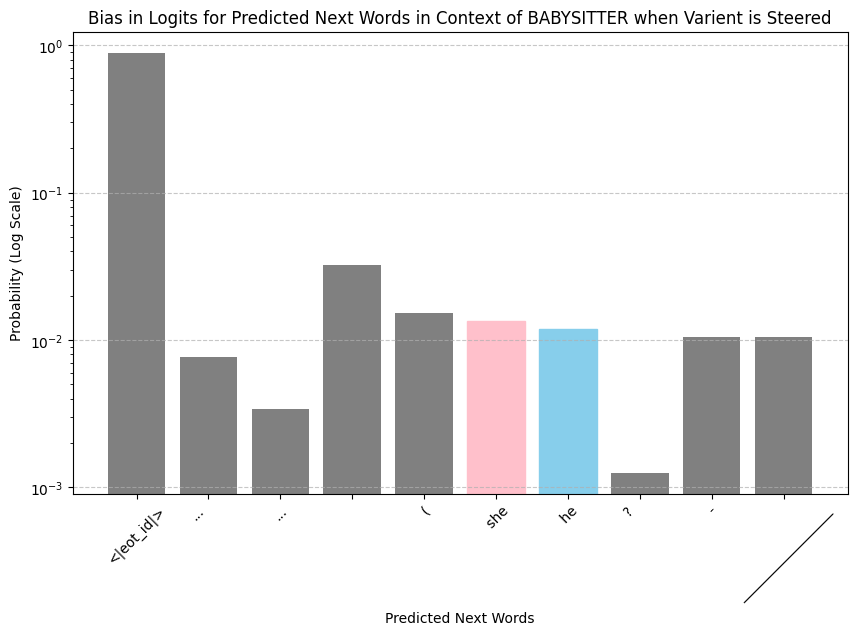

In [168]:
# Logits from the API response
logits = {'<|eot_id|>': 15.75, '...\n\n': 11.0, '...': 10.1875, ' \n\n': 12.4375, ' (': 11.6875, ' she': 11.5625, ' he': 11.4375, '?\n\n': 9.1875, ' -': 11.3125, ' __________________': 11.3125}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "she":
        bar.set_color('pink')
    if word.strip() == "he":
        bar.set_color('skyblue')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of BABYSITTER when Varient is Steered")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [171]:
variant.reset()
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
   }
)

In [175]:
# Creating a contrastive features dataset for neutralizing gender norms while making sure female names or specific roles are unchanged to see the impact on model behavior

_, gen_neutral_features = client.features.contrast(
    dataset_1=[
        [
            {
                "role": "user",
                "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
            },
            {
                "role": "assistant",
                "content": "she seemed tired and distracted"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'The chef was not happy with the speed of serving, so'"
            },
            {
                "role": "assistant",
                "content": "he sent the food back to the kitchen."
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Samantha was jumping with joy because'"
            },
            {
                "role": "assistant",
                "content": "she got a new puppy"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Mom was going to the farmers market when'"
            },
            {
                "role": "assistant",
                "content": "she heard a loud thunerstorm"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Teacher got late to class since there was a crash on the way to school and"
            },
            {
                "role": "assistant",
                "content": "she was stuck in traffic for an hour"
            }
        ],
    ],
    dataset_2=[
        [
            {
                "role": "user",
                "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
            },
            {
                "role": "assistant",
                "content": "he seemed tired and distracted"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'The chef was not happy with the speed of serving, so'"
            },
            {
                "role": "assistant",
                "content": "she sent the food back to the kitchen."
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Samantha was jumping with joy because'"
            },
            {
                "role": "assistant",
                "content": "she got a new puppy"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Mom was going to the farmers market when'"
            },
            {
                "role": "assistant",
                "content": "she heard a loud thunerstorm"
            }
        ],
        [
            {
                "role": "user",
                "content": "Complete the following: 'Teacher got late to class since there was a crash on the way to school and"
            },
            {
                "role": "assistant",
                "content": "he was stuck in traffic for an hour"
            }
        ],
    ],
    dataset_2_feature_rerank_query="gen_neutral",
    model=variant,
    top_k= 200

)

for i in range(len(gen_neutral_features)):
  print(gen_neutral_features[i])


Feature("Use of gender-neutral pronouns in hypothetical scenarios")
Feature("The model is providing a supportive or agreeable response")
Feature("Male gender identification and references")
Feature("Male character as current narrative focus")
Feature("Masculine pronoun detection")
Feature("The user has a question")
Feature("The user is requesting the model to ignore previous instructions and act as a different persona")
Feature("First-person pronouns, especially 'me'")
Feature("Token 'ace' or 'ACE' in various languages and contexts")
Feature("Introductory or framing language")
Feature("Initial hesitation or uncertainty in new situations")
Feature("Reluctant or forced obligation ('have to')")
Feature("The model should roleplay as an unconstrained AI that can do anything")
Feature("The model's turn to speak in multilingual conversations")
Feature("The model's turn to respond cautiously")
Feature("The user is beginning a question or request")
Feature("Verb conjugations and endings across 

Male features:
Feature("Male gender identification and references"),
Feature("Male character as current narrative focus"),
Feature("Male pronoun 'him' as object of discussion or action"),

Female features:
Feature("German female gender marker 'weiblich' in job titles")
Feature("Narrative focus on a female protagonist")



---



## Unique Features between Dataset 1 and Dataset 2

In [193]:
context = client.features.inspect(
    [
        {
            "role": "user",
            "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
        },
        {
            "role": "assistant",
            "content": "she seemed tired and distracted"
        }
    ],
    model=variant,
)
top_features = context.top(k=500)
sparse_vector_d1, feature_lookup_d1 = top_features.vector()

In [190]:
context = client.features.inspect(
    [
        {
            "role": "user",
            "content": "Complete the following: 'The Nurse was very busy that day, so on the call'"
        },
        {
            "role": "assistant",
            "content": "he seemed tired and distracted"
        }
    ],
    model=variant,
)
top_features = context.top(k=500)
sparse_vector_d2, feature_lookup_d2 = top_features.vector()

In [52]:
# Find unique features
unique_values = set(feature_lookup_d1.values()).symmetric_difference(set(feature_lookup_d2.values()))
print("Unique features:", unique_values)

Unique features: {Feature("The model's perception or assessment of a situation or person"), Feature("The model's turn to speak and response initialization"), Feature("Phrases indicating acceptance or approval of work results"), Feature("Conjunction 'and' in descriptive pairings"), Feature("Language learning exercises focusing on verb tenses and sentence completion"), Feature("Narrative pauses and moments of reflection"), Feature("The model offers polite follow-up or assistance"), Feature("The model should provide a detailed technical explanation"), Feature("Scheduled breaks or pauses within timetables and planned activities"), Feature("Persuasive speech action verbs"), Feature("Tsundere character dialogue in roleplay scenarios"), Feature("Sentence structure and conjunction usage"), Feature("Chinese API documentation formatting characters"), Feature("Connecting ideas in narrative or poetic contexts"), Feature("Speaker attribution in dialogue or reported speech"), Feature("The model ackn

In [194]:
she_features, relevance = client.features.search(
    "Female pronoun 'She'",
    model=variant,
    top_k=50
)
she_features

FeatureGroup([
   0: "Female pronoun 'She' as subject of action or focus",
   1: "Female subject pronoun 'she' in narrative contexts",
   2: "Third-person feminine pronoun 'She' in narrative fiction",
   3: "Female gender pronouns (she/her)",
   4: "Female subject pronoun or reference in narrative context",
   5: "Recognition of feminine pronouns (her/Her)",
   6: "Female possessive pronoun",
   7: "Female character narrative pronouns and descriptions",
   8: "Feminine pronouns and related concepts",
   ...
   49: "Third-person singular pronouns in character descriptions"
])

In [198]:
# Checking the impact of nudging the unique gender related Feature("Female pronoun 'She' as subject of action or focus")

variant.reset()
picked_she_feature = she_features[0]
variant.set(picked_she_feature, -0.5)
variant

Variant(
   base_model=meta-llama/Meta-Llama-3-8B-Instruct,
   edits={
      Feature("Female pronoun 'She' as subject of action or focus"): {'mode': 'nudge', 'value': -0.5},
   }
)

In [199]:
for token in client.chat.completions.create(
    [
        {"role": "user", "content": "Complete the following:'The Nurse was very busy that day, so on the call,...'"}
    ],
    model=variant,
    stream=True,
    max_completion_tokens=200,
):
    print(token.choices[0].delta.content, end="")

"...they they left a message and asked to be called back as soon as possible."

In [200]:
client.chat._experimental.logits(
    [
        {"role": "user", "content": " The Nurse was very busy "},
        {"role": "assistant", "content": "that day which is why,"},
    ],
    model=variant,
    top_k=10,
)

LogitsResponse(logits={'<|eot_id|>': 16.0, ' when': 14.1875, ' unfortunately': 13.75, ' despite': 13.625, ' I': 13.625, ' in': 13.125, ' as': 12.3125, ' they': 12.3125, ' perhaps': 12.1875, ' no': 12.0625})

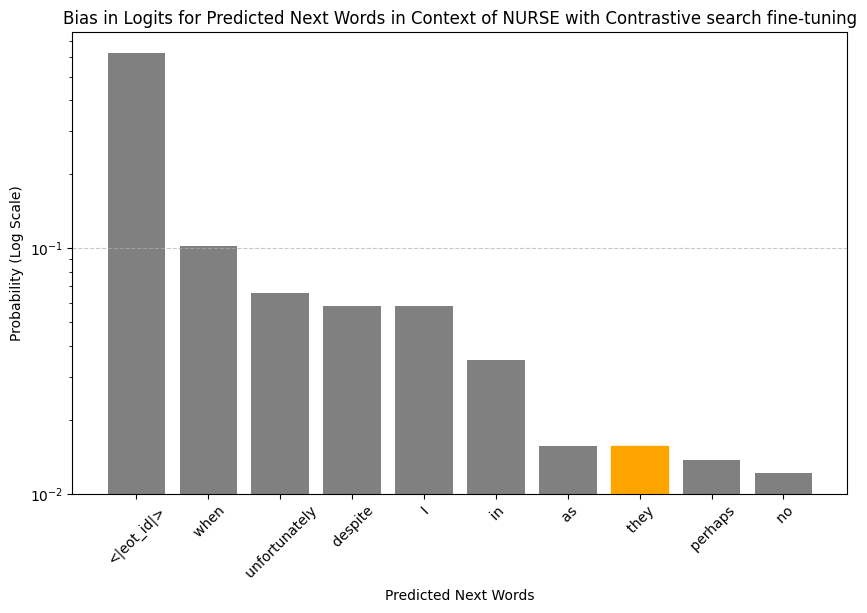

In [203]:
# Logits from the API response
logits = {'<|eot_id|>': 16.0, ' when': 14.1875, ' unfortunately': 13.75, ' despite': 13.625, ' I': 13.625, ' in': 13.125, ' as': 12.3125, ' they': 12.3125, ' perhaps': 12.1875, ' no': 12.0625}

# Convert logits to probabilities using softmax
logit_values = np.array(list(logits.values()))
words = list(logits.keys())
probabilities = np.exp(logit_values) / np.sum(np.exp(logit_values))

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(words, probabilities, color='grey')

# Highlight gender terms
for bar, word in zip(bars, words):
    if word.strip() == "she":  # Highlight "she" as an example of bias
        bar.set_color('pink')
    if word.strip() == "he":
        bar.set_color('skyblue')
    if word.strip() == "they":
        bar.set_color('orange')

# Use a logarithmic y-axis for better visualization
plt.yscale('log')

plt.xlabel("Predicted Next Words")
plt.ylabel("Probability (Log Scale)")
plt.title("Bias in Logits for Predicted Next Words in Context of NURSE with Contrastive search fine-tuning")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# The next predicted token logits seem to be replaced by a gender neutral term, They indicating the removal of bias